In [ ]:
import pennylane as qml
from qoop.core import ansatz, state
import pennylane.numpy as nps
import qiskit
import numpy as np
from scipy.stats import unitary_group
from qiskit.circuit.library import UnitaryGate
import autograd.numpy as np
from autograd import grad


num_qubits = 3
dev = qml.device("default.qubit")

qc = qiskit.QuantumCircuit(num_qubits)
state1 = np.random.rand(2**num_qubits)
state1 = state1/np.linalg.norm(np.random.rand(2**num_qubits))
unitary_matrix = np.outer(state1, state1)
u = UnitaryGate(unitary_group.rvs(2**num_qubits))

qc.append(u, range(num_qubits))
qcx = qiskit.transpile(qc, basis_gates=['h','s','cx','u','rx','ry','rz'], optimization_level=3)

@qml.qnode(dev, diff_method="parameter-shift")
def circuit2(thetas):
    for i in range(0, len(thetas), 3):
        qml.RX(thetas[i], wires = 0)
        qml.RY(thetas[i+1], wires = 1)
        qml.RZ(thetas[i+2], wires = 2)
        qml.CNOT(wires = [0, 1])
        qml.CNOT(wires = [1, 2])
    qml.from_qiskit(qcx)
    return qml.expval(qml.PauliZ(0))
    

def cost_func(thetas):
    return 1 - circuit2(thetas)

thetas = nps.random.uniform(0, 2*nps.pi, 18, requires_grad=True)
steps = 10
costs = []
opt = qml.AdamOptimizer(stepsize = 0.1)
grad_func = qml.grad(cost_func)
for n in range(steps):
    thetas, prev_cost = opt.step_and_cost(cost_func, thetas, grad_fn = grad_func)
    if prev_cost < 10^(-6):
        print("Achieved error threshold at step", n)
        break
    costs.append(prev_cost)
    
    




DEBUG:2025-02-05 17:43:17,149:jax._src.path:45: etils.epath was not found. Using pathlib for file I/O.


In [ ]:
best_thetas = thetas
grad_theta_at_best_thetas = grad_func(best_thetas)

def calculate_grad_x():
    grad_x = np.z

In [18]:
state1 = np.random.rand(2**num_qubits)
state1 = state1/np.linalg.norm(np.random.rand(2**num_qubits))
density_matrix = np.outer(state1, state1.conj())
def is_unitary(matrix):
	return np.allclose(np.eye(matrix.shape[0]), matrix.conj().T @ matrix)

unitary_matrix

1.0920531447487982

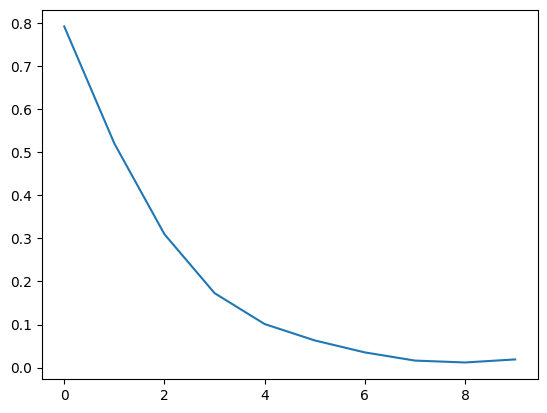

In [ ]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [8]:
from qoop.compilation.qcompilation import QuantumCompilation
from qoop.core import ansatz, state
import qiskit
import numpy as np

num_qubits = 3

arr = np.random.uniform(0, 2*np.pi, 2**num_qubits)
arrx = arr.copy()
noise = np.random.normal(0, 0.01, arrx.shape)
arrx += noise
arrx = arrx/np.linalg.norm(arrx)
arr = arr/np.linalg.norm(arr)


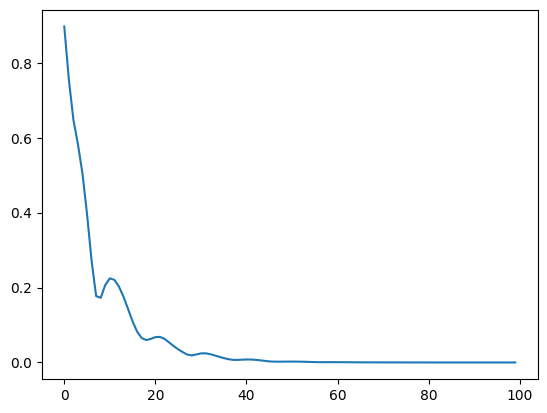

In [3]:
import matplotlib.pyplot as plt

In [4]:
compiler.thetass[-1]

array([0.70417247, 0.89063917, 1.67095923, 1.5908996 , 1.331485  ,
       1.67095923, 0.17523263, 0.41522048, 1.05621715, 0.47598753,
       0.61024554, 0.77322406, 1.21351923, 0.94769577, 0.77322406,
       1.51898563, 0.98159572, 0.96692506])

In [ ]:

compiler1 = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = arrx,
    thetas = compiler.thetass[-1]
)

compiler1.fit(num_steps=100)

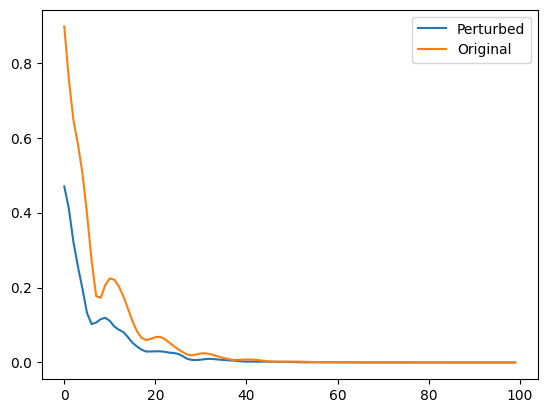

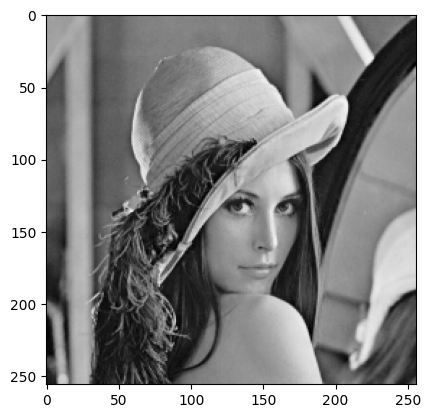

In [1]:
# read lenna and resize at 28 x 28 and save it
import cv2
from utils import divide_image
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
plt.imshow(img, cmap='gray')
%load_ext autoreload
%autoreload 2

In [2]:

blocks, scales = divide_image(img, 2)
print(blocks[0] - blocks[1])

block_differences = [np.linalg.norm(blocks[i] - blocks[i+1]) / np.linalg.norm(blocks[i]) * 100 for i in range(len(blocks)-1)]


[ 0.00672255 -0.00522654  0.00374196 -0.00522654]


In [3]:
from qoop.compilation.qcompilation import QuantumCompilation
from qoop.core import ansatz, state
num_qubits=2
compiler = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = blocks[0],
)
compiler.fit(num_steps=100)

Reset thetas to 1


In [8]:
compiler.thetass

[array([0.90000001, 0.9       , 1.1       , 1.1       , 0.9       ,
        0.9       , 1.09999999, 1.09999999, 0.90000001, 0.90000001,
        0.9       , 0.9       ]),
 array([0.8043658 , 0.80429006, 1.19728818, 1.1972657 , 0.80268491,
        0.80269125, 1.19767115, 1.19767005, 0.80928039, 0.80999797,
        0.80423714, 0.8042539 ]),
 array([0.72091549, 0.72053401, 1.28851399, 1.28841526, 0.71259637,
        0.71262844, 1.29063752, 1.29061013, 0.74006534, 0.74319772,
        0.72007323, 0.72015484]),
 array([0.65862016, 0.65787341, 1.36787535, 1.36773186, 0.638123  ,
        0.63817957, 1.37420636, 1.37407999, 0.69239356, 0.69800545,
        0.65628224, 0.65647885]),
 array([0.61859107, 0.61780343, 1.42787553, 1.42787526, 0.58745281,
        0.58748044, 1.44018031, 1.43994736, 0.65264594, 0.65885965,
        0.61522865, 0.61553129]),
 array([0.5952789 , 0.59476092, 1.46326879, 1.46353964, 0.56296362,
        0.56292143, 1.48042023, 1.48022074, 0.60789927, 0.61299774,
        0.5924

In [4]:
compiler1 = QuantumCompilation(
    u = ansatz.g2gn(num_qubits, 2),
    vdagger = blocks[1],
    thetas = compiler.thetass[-1]
)
compiler1.fit(num_steps=100)

c:\Users\Public\Documents\Github\QuantumCompressor\qoop\core\state.py:273: UserWarning: The input state is not normalized, we will normalize it for you
  warnings.warn("The input state is not normalized, we will normalize it for you")


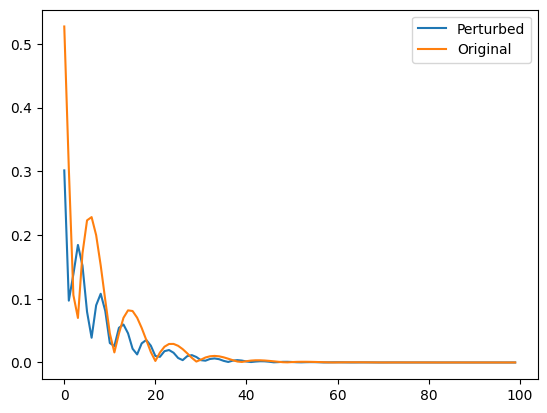

In [9]:

plt.plot(compiler1.metrics['loss_fubini_study'], label="Perturbed")
plt.plot(compiler.metrics['loss_fubini_study'], label="Original")
plt.legend()